# 鲍鱼年龄预测问题

####  首先我们导入将要使用的一些Python模块和工具包。
#### 并将将鲍鱼数据集 abalone.csv 读取为 Pandas 的 DataFrame 格式。

#### 1、数据集基本信息
  - 读取数据集
  - 打印数据集前几行
  - 数据集的大小（维度）
  - 检测缺失值
  - 变量类型

In [1]:
import pandas as pd
import warnings
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import Series,DataFrame
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#机器学习的普通线性模型、岭回归模型、lasso模型
from sklearn.linear_model import LinearRegression,Ridge,Lasso

#读取数据集
data = pd.read_csv("D:\\Data\\abalone.csv")
data.head() #打印数据前几行

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [2]:
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
#查看数据集中样本数量和特征数量
data.shape

(4177, 9)

In [4]:
# 使用.info()方法查看数据集的总体信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4176 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
#数据初步展示
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4176.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,10.343142,-4.289544,0.828742,0.359359,0.180594,0.238831,9.933684
std,0.120093,642.113197,286.248204,0.490389,0.221989,0.109614,0.139203,3.224169
min,0.075000,0.055000,-18500.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,41500.000000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

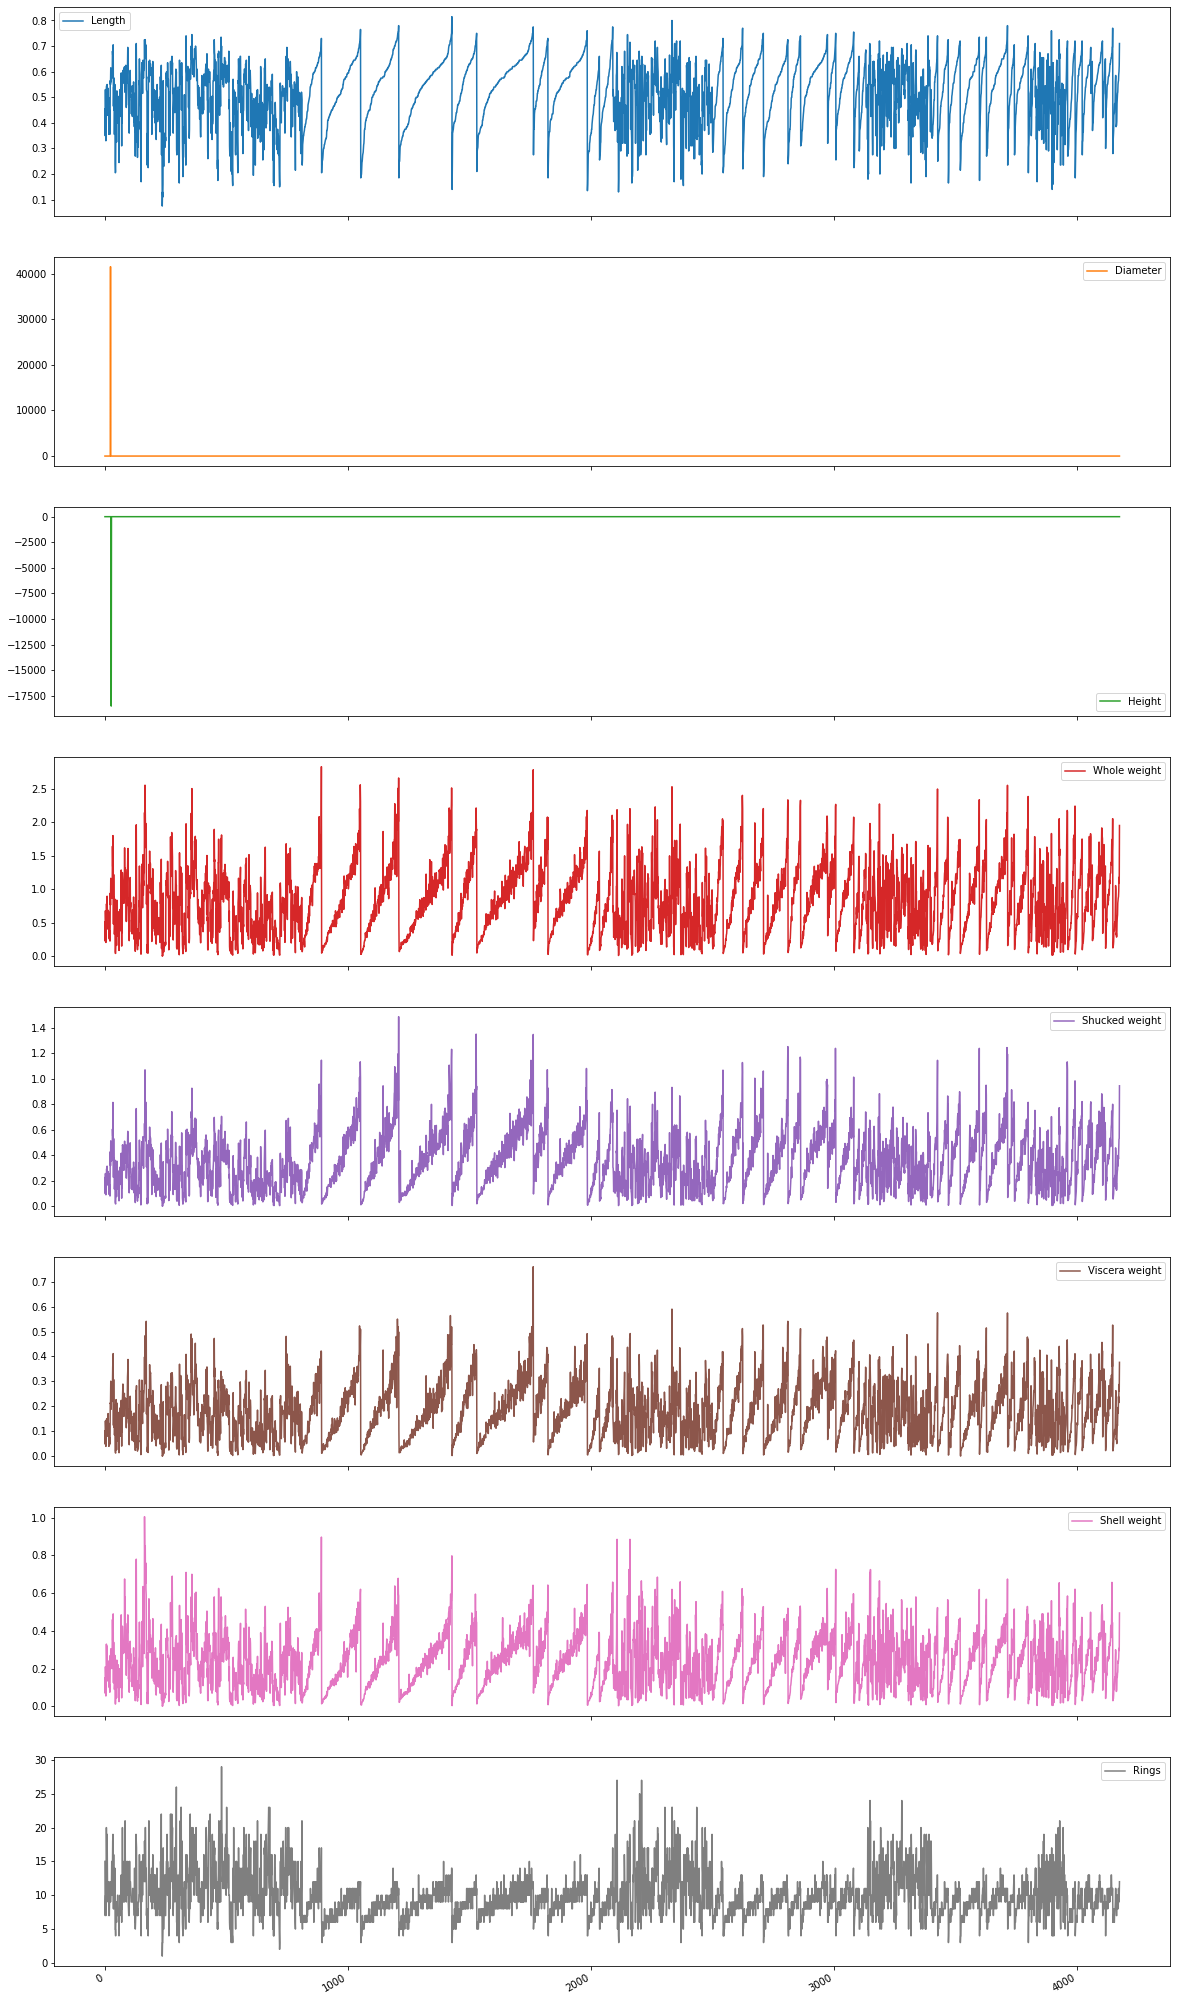

In [6]:
# 数据可视化
data.plot(subplots=True, figsize=(20,40))

In [7]:
# data.columns = ['Sex', 'Length', 'Diameter', 'Height',
#                 'Whole weight', 'Shucked weight', 'Viscera weight',
#                 'Shell weight', 'Rings']

In [8]:
# 将非数值型特征通过特征编码转换为数值特征
data['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

In [9]:
# 将性别（M：雄性，F：雌性，I：未成年）映射成数字
data['Sex'] = data['Sex'].map({'M':0,'F':2,'I':1})

In [10]:
data['Sex'].value_counts()

0    1528
1    1342
2    1307
Name: Sex, dtype: int64

In [11]:
# 检测缺失值
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    1
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [12]:
Shucked_weight = data['Shucked weight']
print(Shucked_weight)

0       0.2245
1       0.0995
2       0.2565
3       0.2155
4       0.0895
         ...  
4172    0.3700
4173    0.4390
4174    0.5255
4175    0.5310
4176    0.9455
Name: Shucked weight, Length: 4177, dtype: float64


### 缺失值处理from sklearn.impute import SimpleImputer
#使用sklearn中的Imputer方法，将数据集“abalone”中“Shucked weight”列利用均值“mean”进行填充
#### 均值填补
#missing_values"缺失值的占位符"  mean"填补策略” axis=0沿列进行填补；axis=1沿行进行填补

In [13]:
# from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(data[["Shucked weight"]])#拟合用于data的填补参数
data["Shucked weight_imputed"]=imp.transform(data[["Shucked weight"]])
# 显示Shucked weight缺失的行，和插补缺失值之后的列"Shucked weight_imputed"
data[data['Shucked weight'].isnull()]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Shucked weight_imputed
29,0,0.575,0.425,0.14,0.8635,NaN,0.227,0.2,11,0.359359


In [14]:
print(data.describe())

               Sex       Length      Diameter        Height  Whole weight  \
count  4177.000000  4177.000000   4177.000000   4177.000000   4177.000000   
mean      0.947091     0.523992     10.343142     -4.289544      0.828742   
std       0.822240     0.120093    642.113197    286.248204      0.490389   
min       0.000000     0.075000      0.055000 -18500.000000      0.002000   
25%       0.000000     0.450000      0.350000      0.115000      0.441500   
50%       1.000000     0.545000      0.425000      0.140000      0.799500   
75%       2.000000     0.615000      0.480000      0.165000      1.153000   
max       2.000000     0.815000  41500.000000      1.130000      2.825500   

       Shucked weight  Viscera weight  Shell weight        Rings  \
count     4176.000000     4177.000000   4177.000000  4177.000000   
mean         0.359359        0.180594      0.238831     9.933684   
std          0.221989        0.109614      0.139203     3.224169   
min          0.001000        0.000

In [15]:
data.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Shucked weight_imputed
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4176.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.947091,0.523992,10.343142,-4.289544,0.828742,0.359359,0.180594,0.238831,9.933684,0.359359
std,0.822240,0.120093,642.113197,286.248204,0.490389,0.221989,0.109614,0.139203,3.224169,0.221962
min,0.000000,0.075000,0.055000,-18500.000000,0.002000,0.001000,0.000500,0.001500,1.000000,0.001000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,0.186000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,0.336000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,0.502000
max,2.000000,0.815000,41500.000000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,1.488000


In [ ]:
data = data.drop(["Shucked weight"],axis=1)

In [16]:
#删除列名为Shucked weight的整列
data = data.drop(["Shucked weight"],axis=1)

In [17]:
data

,Sex,Length,Diameter,Height,Whole weight,Viscera weight,Shell weight,Rings,Shucked weight_imputed
0,0,0.455,0.365,0.095,0.5140,0.1010,0.1500,15,0.2245
1,0,0.350,0.265,0.090,0.2255,0.0485,0.0700,7,0.0995
2,2,0.530,0.420,0.135,0.6770,0.1415,0.2100,9,0.2565
3,0,0.440,0.365,0.125,0.5160,0.1140,0.1550,10,0.2155
4,1,0.330,0.255,0.080,0.2050,0.0395,0.0550,7,0.0895
...,...,...,...,...,...,...,...,...,...
4172,2,0.565,0.450,0.165,0.8870,0.2390,0.2490,11,0.3700
4173,0,0.590,0.440,0.135,0.9660,0.2145,0.2605,10,0.4390
4174,0,0.600,0.475,0.205,1.1760,0.2875,0.3080,9,0.5255
4175,2,0.625,0.485,0.150,1.0945,0.2610,0.2960,10,0.5310


In [18]:
# #离群值检测-构建更好的模型，避免噪音点，训练模型剔除
# # """
# # 使用sklearn中的LocalOutlierFactor方法对数据集“accord_sedan_testing”进行离群值检测
# # """
# from sklearn.neighbors import LocalOutlierFactor
# scaler = LocalOutlierFactor()
# scaler.fit(data)
# data['LOF'] = - scaler.negative_outlier_factor_
# # 显示局部离群因子大于1.5的样本
# data[data.LOF>1.5]

<AxesSubplot:xlabel='Sex', ylabel='count'>

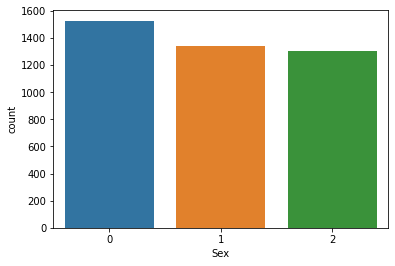

In [19]:
#首先借助 seaborn 中的 countplot 函数绘制条形图，观察 Sex 列的取值分布情况。
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot(x = "Sex", data = data)

In [20]:
# 获取类别数：   
n = len(data['Sex'].unique())
# 获得类别标签：
labels = [data['Sex'].unique()[i] for i in range(n)]
# 获得每个标签的数据个数：
fraces = [data['Sex'].value_counts()[i] for i in range(n)]

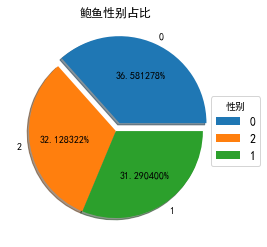

In [21]:
#绘制饼图
explode = [0.1, 0, 0]
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.title("鲍鱼性别占比")
wedges, texts, autotexts = plt.pie(x=fraces, labels=labels, autopct='%0f%%',
        explode=explode,shadow=True)
plt.legend(wedges, labels, fontsize=12, title="性别",
          loc="center left", bbox_to_anchor=(0.91, 0, 0.3, 1))

#### 2、相关分析
seaborn中的热力图是一个有用的描述两个特征之间关系的方法

对于连续特征，使用seaborn的displot函数绘制直方图观察特征取值情况，将8个连续特征的直方图绘制在一个4行2列的子图布局中


D:\Ananconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Ananconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Ananconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

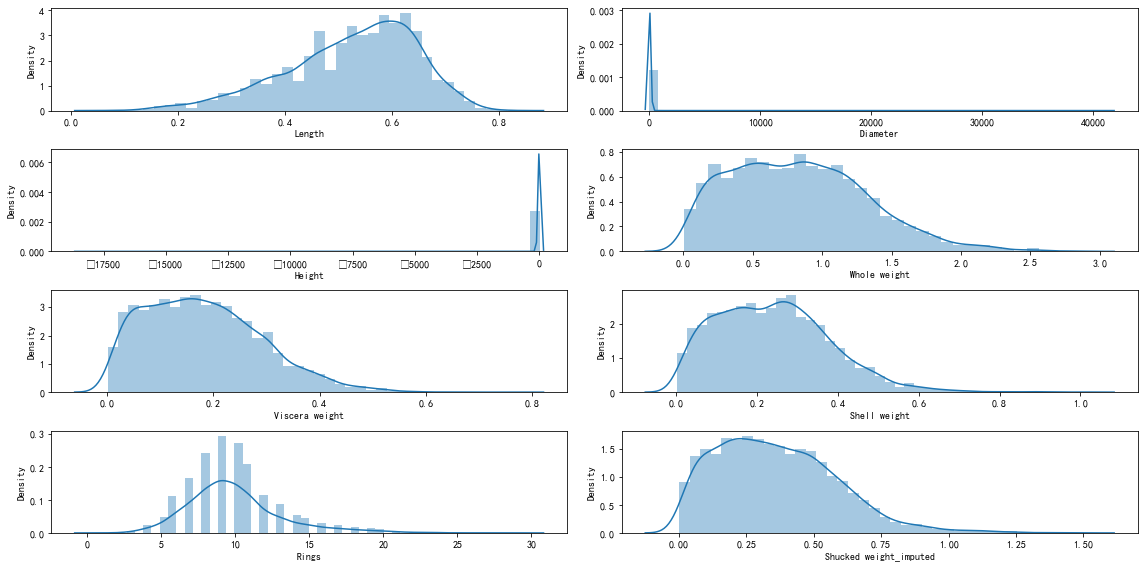

In [22]:
i = 1 # 子图记数
plt.figure(figsize=(16, 8))
for col in data.columns[1:]:
    plt.subplot(4,2,i)
    i = i + 1
    sns.distplot(data[col])  
plt.tight_layout()


C:\Users\86131\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\86131\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


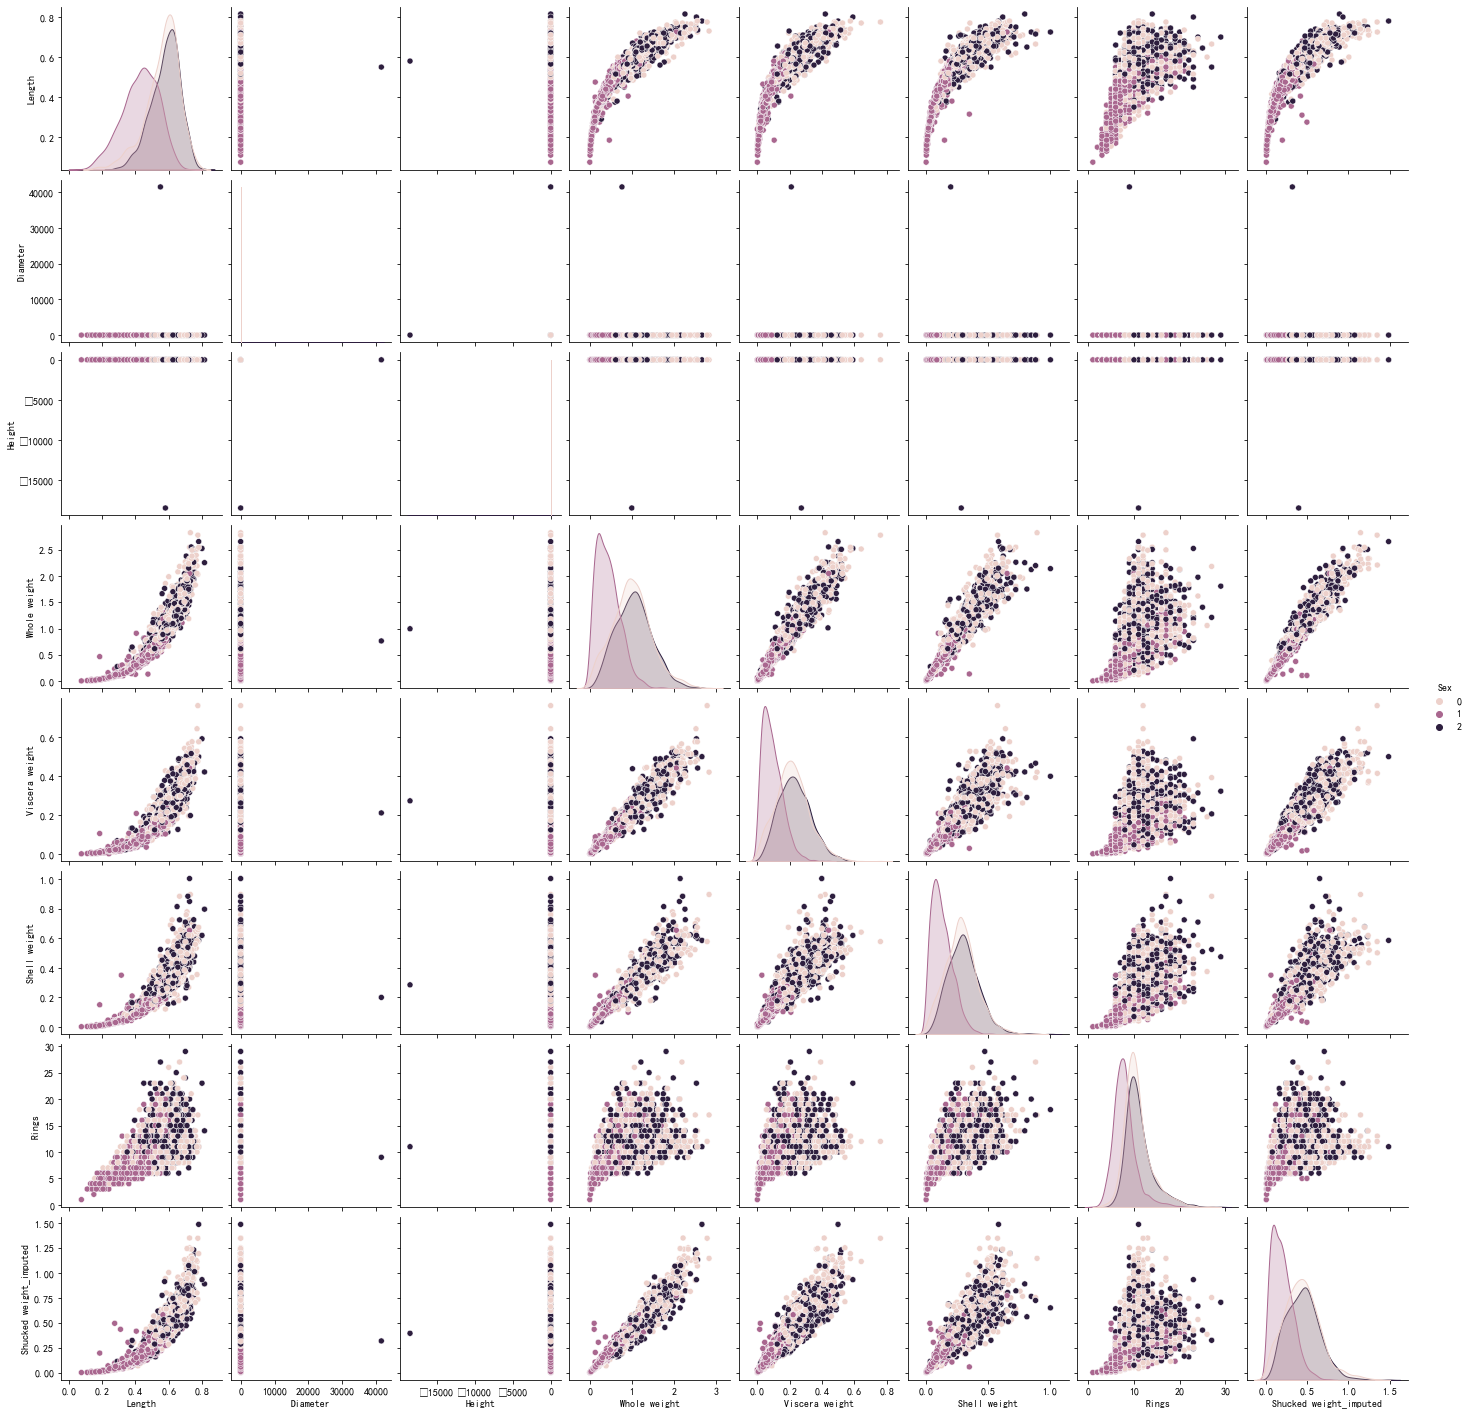

In [23]:
sns.pairplot(data,hue="Sex")

从以上连续特征之间的散点图我们可以看到一些基本结果： 例如从第一行可以看到鲍鱼的长度length和鲍鱼直径diameter、鲍鱼高度height存在明显的现线性关系
鲍鱼长度与鲍鱼的四种重量之间存在明显的非线性关系，
 观察最后一行，鲍鱼环数rings与各个特征均存在正相关性，其中与height线性关系最为直观
#观察对角线上的直方图，可以看到幼鲍鱼（sex取I）在各个特征上的取值明显小于其他成年鲍鱼，而雄性鲍鱼（sex取M）和雌性鲍鱼（sex取F）各个特征取值分布没有明显的差异
为定量分析特征之间的线性相关性，计算特征之间的相关系数矩阵，借助热力图将相关性可视化

#### 为了定量地分析特征之间的线性相关性，我们计算特征之间的相关系数矩阵，并借助热力图将相关性可视化。

In [24]:
# data = data.copy().drop(['Shucked weight'], axis=1)
corr_df = data.corr()
corr_df

,Sex,Length,Diameter,Height,Whole weight,Viscera weight,Shell weight,Rings,Shucked weight_imputed
Sex,1.000000,0.036066,0.019824,-0.019812,0.021391,0.032067,0.034854,0.034627,0.001415
Length,0.036066,1.000000,0.003504,-0.007097,0.925261,0.903018,0.897706,0.556720,0.897901
Diameter,0.019824,0.003504,1.000000,0.000238,-0.001916,0.004291,-0.004177,-0.004393,-0.002746
Height,-0.019812,-0.007097,0.000238,1.000000,-0.005143,-0.012789,-0.005014,-0.005037,-0.002337
Whole weight,0.021391,0.925261,-0.001916,-0.005143,1.000000,0.966375,0.955355,0.540390,0.969406
Viscera weight,0.032067,0.903018,0.004291,-0.012789,0.966375,1.000000,0.907656,0.503819,0.931949
Shell weight,0.034854,0.897706,-0.004177,-0.005014,0.955355,0.907656,1.000000,0.627574,0.882630
Rings,0.034627,0.556720,-0.004393,-0.005037,0.540390,0.503819,0.627574,1.000000,0.420873
Shucked weight_imputed,0.001415,0.897901,-0.002746,-0.002337,0.969406,0.931949,0.882630,0.420873,1.000000


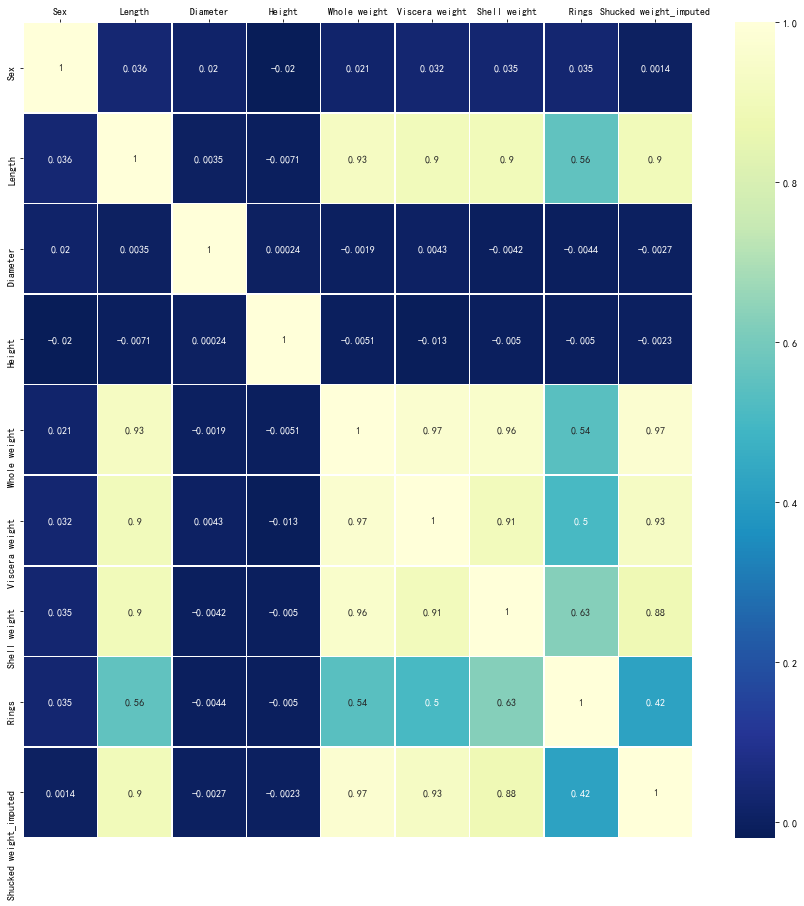

In [25]:
fig, ax = plt.subplots(figsize=(15, 15))
## 绘制热力图
ax = sns.heatmap(corr_df,linewidths=.5,cmap="YlGnBu_r",annot=True,xticklabels=corr_df.columns, yticklabels=corr_df.index)
ax.xaxis.set_label_position('top') 
ax.xaxis.tick_top()

In [26]:
# #鲍鱼数据预处理
# # 对Sex特征进行OneHot编码:使用Pandas的get_dummies函数对sex特征做OneHot编码处理。
# Sex_onehot = pd.get_dummies(data["Sex"], prefix="Sex")
# data[Sex_onehot.columns] = Sex_onehot
# data.head()

#添加取值为1的特征：在后续实现回归模型时，需要使用设计矩阵X，其最后一列取值为1，给数据添加“ones”

In [27]:
data["ones"]=1
data.head()

,Sex,Length,Diameter,Height,Whole weight,Viscera weight,Shell weight,Rings,Shucked weight_imputed,ones
0,0,0.455,0.365,0.095,0.5140,0.1010,0.150,15,0.2245,1
1,0,0.350,0.265,0.090,0.2255,0.0485,0.070,7,0.0995,1
2,2,0.530,0.420,0.135,0.6770,0.1415,0.210,9,0.2565,1
3,0,0.440,0.365,0.125,0.5160,0.1140,0.155,10,0.2155,1
4,1,0.330,0.255,0.080,0.2050,0.0395,0.055,7,0.0895,1


根据鲍鱼环计算年龄：通过环数rings加上1.5得到

In [28]:
data["Age"]=data["Rings"]+1.5
data.head()

,Sex,Length,Diameter,Height,Whole weight,Viscera weight,Shell weight,Rings,Shucked weight_imputed,ones,Age
0,0,0.455,0.365,0.095,0.5140,0.1010,0.150,15,0.2245,1,16.5
1,0,0.350,0.265,0.090,0.2255,0.0485,0.070,7,0.0995,1,8.5
2,2,0.530,0.420,0.135,0.6770,0.1415,0.210,9,0.2565,1,10.5
3,0,0.440,0.365,0.125,0.5160,0.1140,0.155,10,0.2155,1,11.5
4,1,0.330,0.255,0.080,0.2050,0.0395,0.055,7,0.0895,1,8.5


构造特征集
将预测目标设置为Age列，然后构造两组特征，一组包含ones,一组不含ones

In [29]:
y = data['Age']
features_with_ones = ["Length","Diameter","Height","Whole weight","Shucked weight_imputed","Viscera weight","Shell weight","Sex","ones"]
features_without_ones=["Length","Diameter","Height","Whole weight","Shucked weight_imputed","Viscera weight","Shell weight","Sex"]
X = data[features_with_ones]

##### 将鲍鱼数据集划分为训练集和测试集，75%样本为训练样本，25%样本未测试样本

In [30]:
# 划分训练集和测试集
from sklearn import model_selection

X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=0.25, random_state=111)

### 3、 实现线性回归和岭回归
### 3.1使用Numpy实现线性回归

In [31]:
import numpy as np
def linear_regression(X,y):
    w = np.zeros_like(X.shape[1])
    if np.linalg.det(X.T.dot(X)) != 0 :
        w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return w

使用上述实现的线性回归模型在鲍鱼训练集上训练模型

In [32]:
w1 = linear_regression(X_train,y_train)
w1 = pd.DataFrame(data = w1,index = X.columns,columns = ["numpy_w"])
w1.round(decimals=2)

,numpy_w
Length,10.68
Diameter,-0.00
Height,-0.00
Whole weight,10.12
Shucked weight_imputed,-21.20
Viscera weight,-9.73
Shell weight,8.72
Sex,-0.03
ones,4.78


sklearn 中的 linear_model 模块实现了常见的线性模型，包括线性回归、岭回归和 LASSO 等。对应的算法和类名如下表所示。

算法类名线性回归linear_model.LinearRegression岭回归linear_model.RidgeLASSOlinear_model.Lasso

下面我们使用 LinearRegression 构建线性回归模型。注意，此时传给 fit 方法的训练集的特征部分不包括 ones 列。模型训练完成后，lr.coef_ 属性和 lr.intercept_ 属性分别保存了学习到的回归系数向量和截距项。

In [33]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(X_train[features_without_ones],y_train)
w_lr = []
w_lr.extend(lr.coef_)
w_lr.append(lr.intercept_)
w1["lr_sklearn_w"] = w_lr
w1.round(decimals=2)

,numpy_w,lr_sklearn_w
Length,10.68,10.68
Diameter,-0.00,-0.00
Height,-0.00,-0.00
Whole weight,10.12,10.12
Shucked weight_imputed,-21.20,-21.20
Viscera weight,-9.73,-9.73
Shell weight,8.72,8.72
Sex,-0.03,-0.03
ones,4.78,4.78


对比上表可以看到，在训练集上训练鲍鱼年龄预测模型时，我们使用 Numpy 实现的线性回归模型与 sklearn 得到的结果是一致的。

### 3.2 使用Numpy实现岭回归（Ridge）
定义 ridge_regression 函数来求解，它包括三个参数：训练集特征矩阵 X, 训练集标签向量 y，以及正则化系数 ridge_lambda。

单位矩阵可使用 np.eye 函数自动生成，其大小为（d+1)，即与特征矩阵 X 的列数(X.shape[1])相同。岭回归解即w

In [34]:
def ridge_regression(X,y,ridge_lambda):
    penalty_matrix = np.eye(X.shape[1])
    penalty_matrix[X.shape[1] - 1][X.shape[1] - 1] = 0
    w = np.linalg.inv(X.T.dot(X) + ridge_lambda * penalty_matrix).dot(X.T).dot(y)
    return w

在鲍鱼训练集上使用 ridge_regression 函数训练岭回归模型，正则化系数设置为 1 。

In [35]:
w2 = ridge_regression(X_train,y_train,1.0)
w1["numpy_ridge_w"] = w2
w1.round(decimals=2)

,numpy_w,lr_sklearn_w,numpy_ridge_w
Length,10.68,10.68,9.08
Diameter,-0.00,-0.00,-0.00
Height,-0.00,-0.00,0.00
Whole weight,10.12,10.12,7.61
Shucked weight_imputed,-21.20,-21.20,-17.82
Viscera weight,-9.73,-9.73,-5.54
Shell weight,8.72,8.72,10.50
Sex,-0.03,-0.03,-0.02
ones,4.78,4.78,5.30


### 与 sklearn 中岭回归对比，同样正则化系数设置为 1 。

In [36]:
from sklearn.linear_model import Ridge
ridge = linear_model.Ridge(alpha=1.0)
ridge.fit(X_train[features_without_ones],y_train)
w_ridge = []
w_ridge.extend(ridge.coef_)
w_ridge.append(ridge.intercept_)
w1["ridge_sklearn_w"] = w_ridge
w1.round(decimals=2)

,numpy_w,lr_sklearn_w,numpy_ridge_w,ridge_sklearn_w
Length,10.68,10.68,9.08,9.08
Diameter,-0.00,-0.00,-0.00,-0.00
Height,-0.00,-0.00,0.00,0.00
Whole weight,10.12,10.12,7.61,7.61
Shucked weight_imputed,-21.20,-21.20,-17.82,-17.82
Viscera weight,-9.73,-9.73,-5.54,-5.54
Shell weight,8.72,8.72,10.50,10.50
Sex,-0.03,-0.03,-0.02,-0.02
ones,4.78,4.78,5.30,5.30


### 4、使用LASSO构建鲍鱼年龄预测模型
回归系数向量和截距项

In [37]:
from sklearn.linear_model import Lasso
lasso = linear_model.Lasso(alpha=0.01)
lasso.fit(X_train[features_without_ones],y_train)
print(lasso.coef_)
print(lasso.intercept_)

[ 6.04771013e+00 -2.17450523e-05  1.03311457e-05  5.26380042e+00
 -1.43748106e+01 -0.00000000e+00  1.15789581e+01 -0.00000000e+00]
6.31437794680784


### 5、鲍鱼模型预测效果评估

#### 5.1 MAN和决定系数R^2

使用训练集构建了 lr线性回归, ridge 岭回归和 lasso 三个模型。我们首先来看下这三个模型测试集中，** 均方误差和决定系数R^2 ** 分别为多少。

In [38]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
y_test_pred_lr = lr.predict(X_test.iloc[:,:-1])
print(round(mean_absolute_error(y_test,y_test_pred_lr),4))

y_test_pred_ridge = ridge.predict(X_test[features_without_ones])
print(round(mean_absolute_error(y_test,y_test_pred_ridge),4))

y_test_pred_lasso = lasso.predict(X_test[features_without_ones])
print(round(mean_absolute_error(y_test,y_test_pred_lasso),4))

1.6206
1.6294
1.6564


In [39]:
from sklearn.metrics import r2_score
print(round(r2_score(y_test,y_test_pred_lr),4))
print(round(r2_score(y_test,y_test_pred_ridge),4))
print(round(r2_score(y_test,y_test_pred_lasso),4))

0.55
0.5471
0.5326


#### 5.2 残差图

残差图是一种用来诊断回归模型效果的图。在残差图中，如果点随机分布在0附近，则说明回归效果较好。 如果在残差图中发现了某种结构，则说明回归效果不佳，需要重新建模。

Text(0.5, 0, 'Predict')

C:\Users\86131\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\86131\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


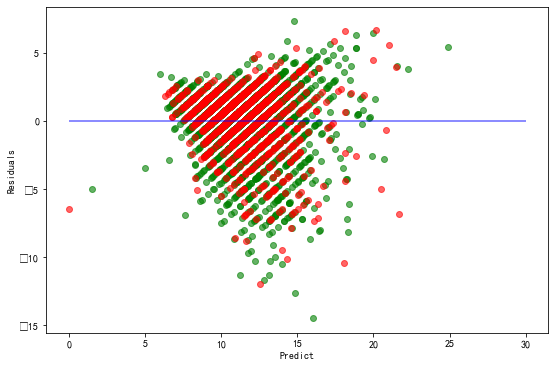

In [40]:
plt.figure(figsize=(9, 6))
y_train_pred_ridge = ridge.predict(X_train[features_without_ones])
plt.scatter(y_train_pred_ridge, y_train_pred_ridge - y_train, c="g", alpha=0.6)
plt.scatter(y_test_pred_ridge, y_test_pred_ridge - y_test, c="r",alpha=0.6)
plt.hlines(y=0, xmin=0, xmax=30,color="b",alpha=0.6)
plt.ylabel("Residuals")
plt.xlabel("Predict")

#### 5.3 岭迹


In [41]:
alphas = np.logspace(-10,10,20)
coef = pd.DataFrame()
for alpha in alphas:
    ridge_clf = Ridge(alpha=alpha)
    ridge_clf.fit(X_train[features_without_ones],y_train)
    df = pd.DataFrame([ridge_clf.coef_],columns=X_train[features_without_ones].columns)
    df['alpha'] = alpha
    coef = coef.append(df,ignore_index=True)
coef.head().round(decimals=2)

,Length,Diameter,Height,Whole weight,Shucked weight_imputed,Viscera weight,Shell weight,Sex,alpha
0,10.68,-0.0,-0.0,10.12,-21.2,-9.73,8.72,-0.03,0.0
1,10.68,-0.0,-0.0,10.12,-21.2,-9.73,8.72,-0.03,0.0
2,10.68,-0.0,-0.0,10.12,-21.2,-9.73,8.72,-0.03,0.0
3,10.68,-0.0,-0.0,10.12,-21.2,-9.73,8.72,-0.03,0.0
4,10.68,-0.0,-0.0,10.12,-21.2,-9.73,8.72,-0.03,0.0


Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
C:\Users\86131\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'd

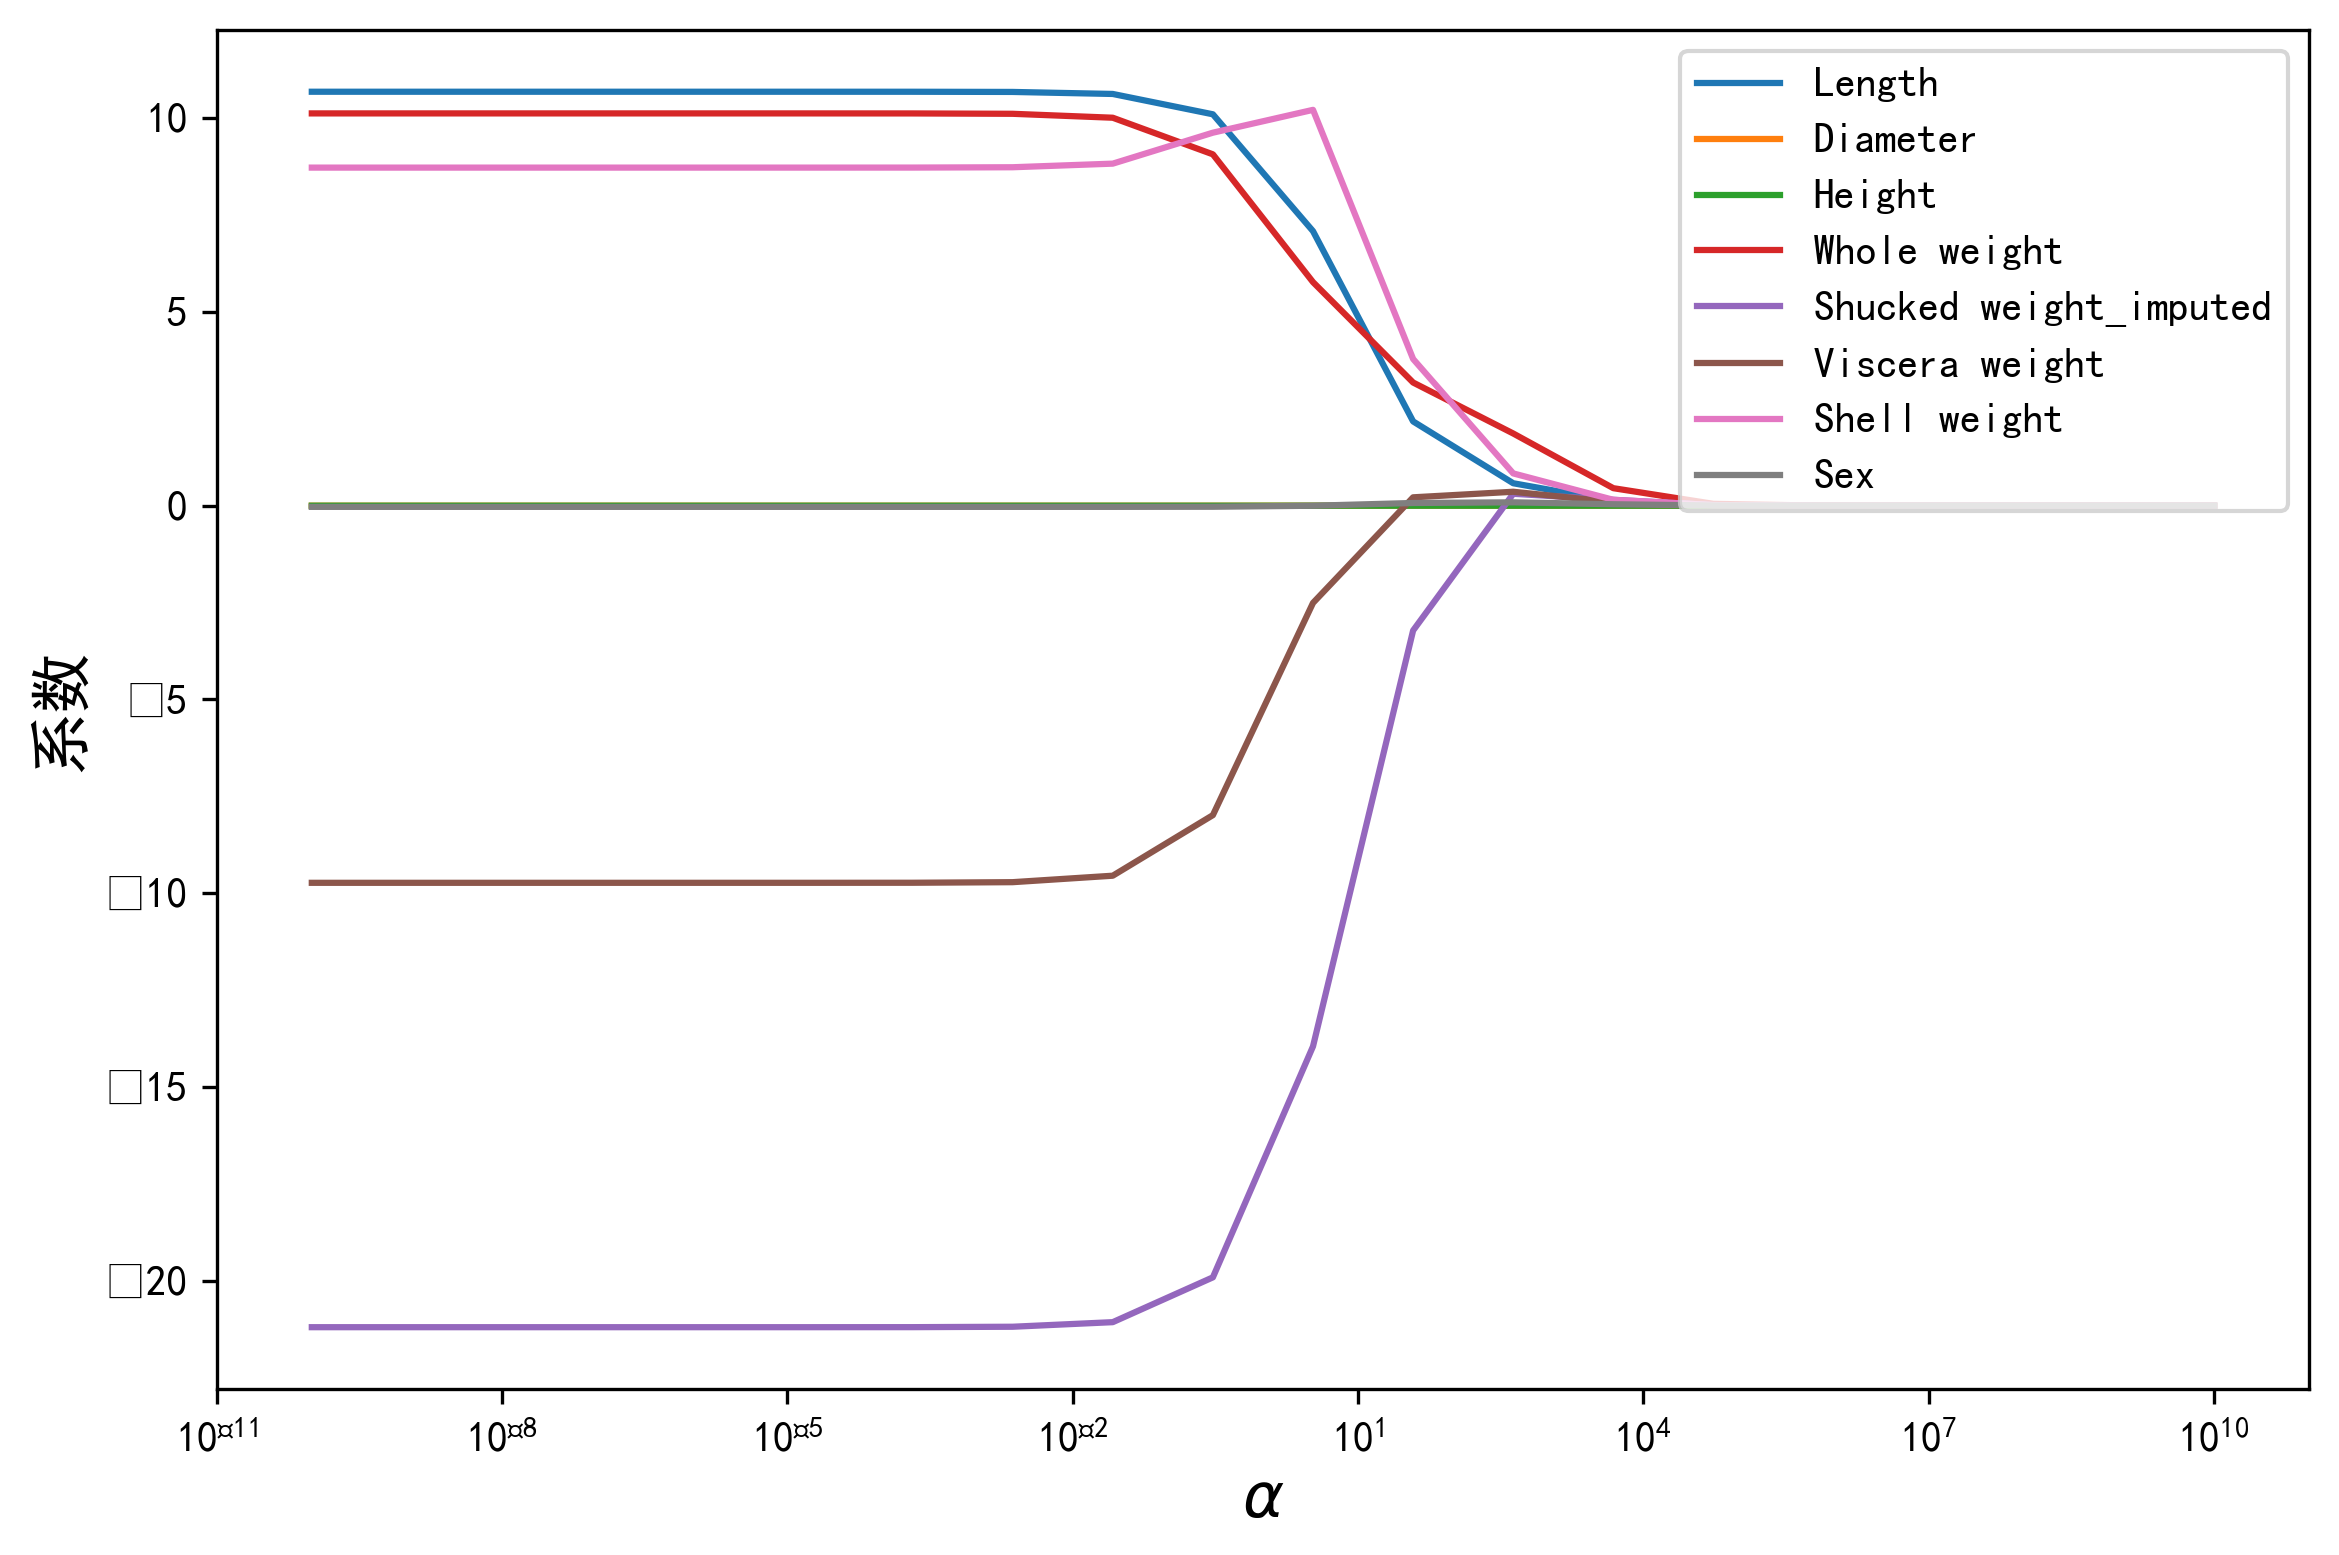

In [42]:
#绘图
plt.rcParams['figure.dpi'] = 300 #分辨率
plt.figure(figsize=(9, 6))
coef['alpha'] = coef['alpha']

for feature in X_train.columns[:-1]:
    plt.plot('alpha',feature,data=coef)
ax = plt.gca()
ax.set_xscale('log')
plt.legend(loc='upper right')
plt.xlabel(r'$\alpha$',fontsize=15)
plt.ylabel('系数',fontsize=15)

plt.show()


# 5.4 LASSO的正则化路径

C:\Users\86131\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\86131\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


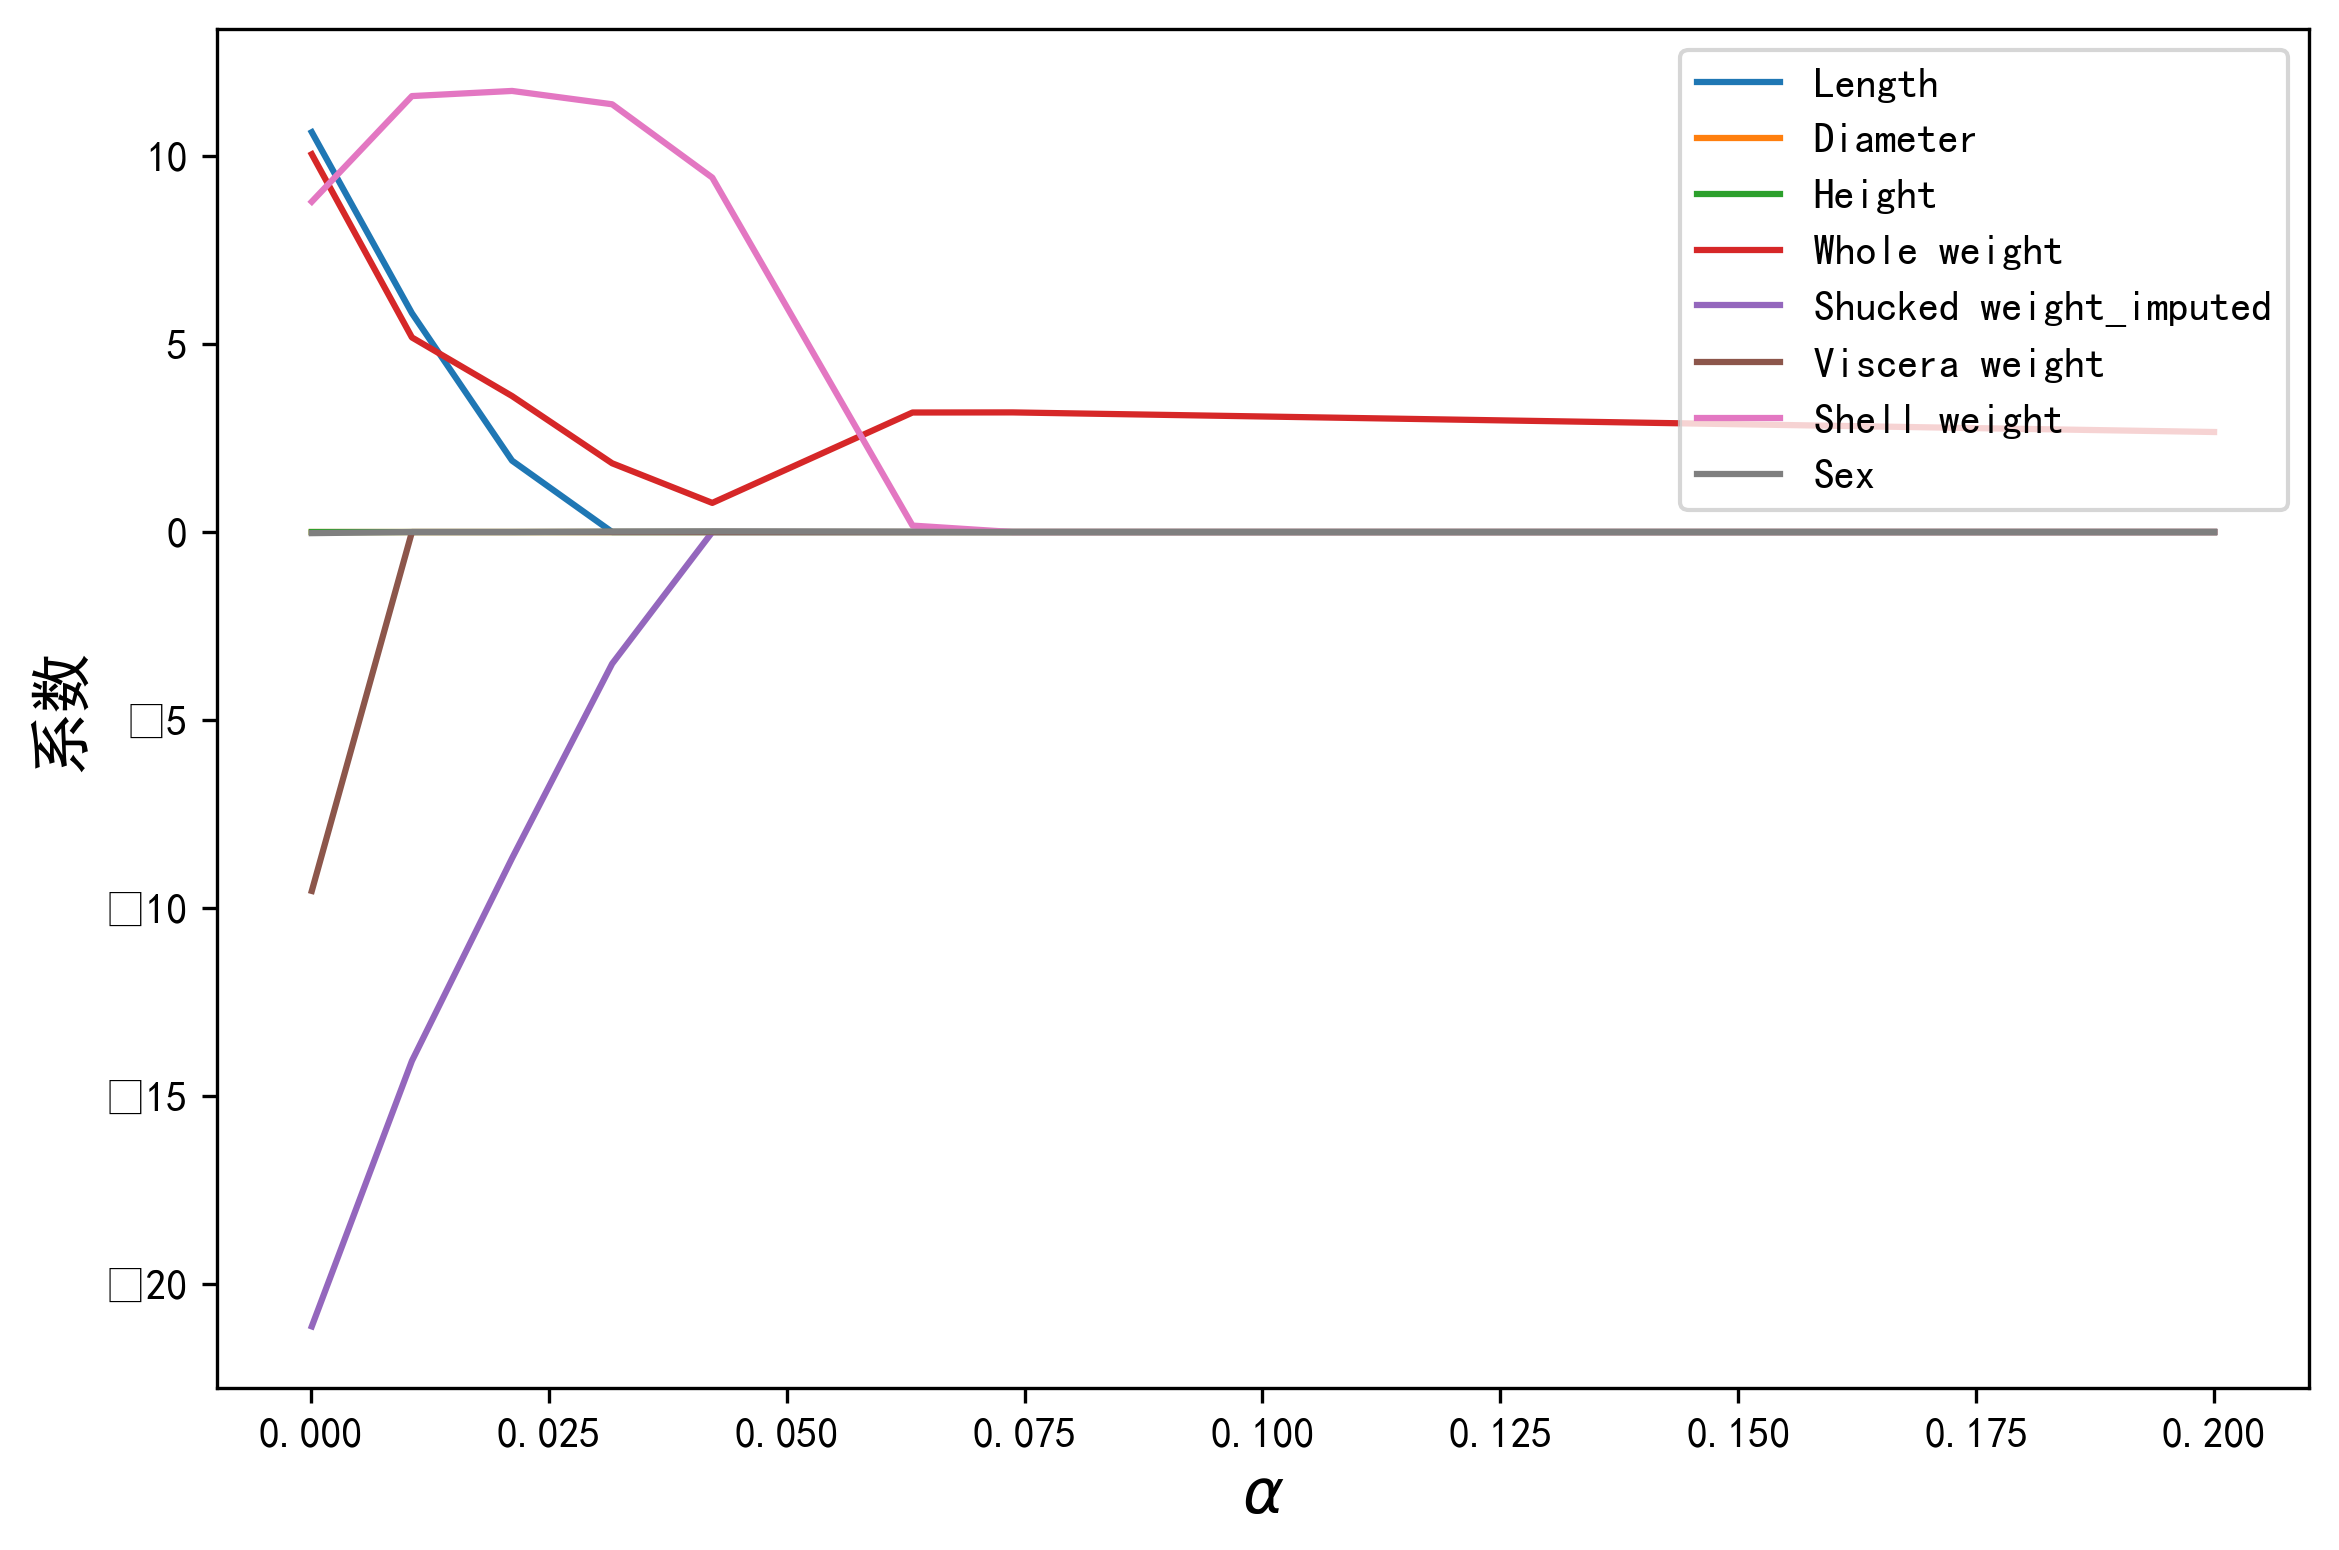

In [43]:
coef = pd.DataFrame()
for alpha in np.linspace(0.0001,0.2,20):
    lasso_clf = Lasso(alpha=alpha)
    lasso_clf.fit(X_train[features_without_ones],y_train)
    df = pd.DataFrame([lasso_clf.coef_],columns=X_train[features_without_ones].columns)
    df['alpha'] = alpha
    coef = coef.append(df,ignore_index=True)
coef.head()
#绘图
plt.figure(figsize=(9, 6))
for feature in X_train.columns[:-1]:
    plt.plot('alpha',feature,data=coef)
plt.legend(loc='upper right')
plt.xlabel(r'$\alpha$',fontsize=15)
plt.ylabel('系数',fontsize=15)
plt.show()